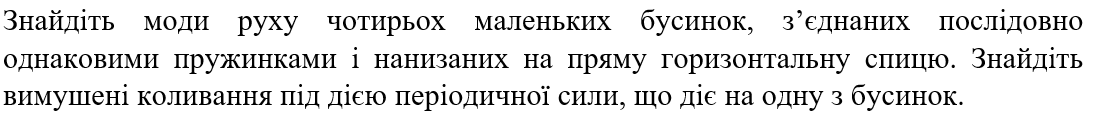

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
t = var("t")
N = 4
x = []
X = []
m = []
v = []
V = []
for i in range(N):
    exec(preparse("m_" + str(i) + " = var(\"m_" + str(i) + "\""")"))
    exec(preparse("X_" + str(i) + " = var(\"x_" + str(i) + "\""")"))
    exec(preparse("V_" + str(i) + " = var(\"v_" + str(i) + "\""")"))
    exec(preparse("x_" + str(i) + " = function(\"x_" + str(i) + "\""")(t)"))
    exec(preparse("v_" + str(i) + " = function(\"v_" + str(i) + "\""")(t)"))
    exec(preparse("m += [m_" + str(i) + "]"))
    exec(preparse("x += [x_" + str(i) + "]"))
    exec(preparse("X += [X_" + str(i) + "]"))
    exec(preparse("v += [v_" + str(i) + "]"))
    exec(preparse("V += [V_" + str(i) + "]"))

In [3]:
k = []
for i in range(N-1):
    exec(preparse("k_" + str(i) + " = var(\"k_" + str(i) + "\""")"))
    exec(preparse("k += [k_" + str(i) + "]"))

In [4]:
T = 0
for i in range(N):
    T += m[i] * x[i].diff(t)^2/2
disp(T)

<IPython.core.display.Math object>

In [5]:
U = 0
for i in range(N-1):
    U += k[i] * (x[i] - x[i+1])^2/2

disp(U)

<IPython.core.display.Math object>

In [6]:
L = T - U
disp(L)

<IPython.core.display.Math object>

обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [7]:
p = []
P = []
for i in range(N):
    p += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == x[i].diff(t))]
    P += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == v[i])]
disp(P)
disp(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [8]:
# система уравнений Эйлера-Лагранжа
eqs = []
for i in range(N):
    eqs += [p[i].diff(t) - L.subs(x[i] == X[i]).diff(X[i]).subs(X[i] == x[i]).expand() == 0]
    disp(eqs[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [9]:

eqs2 = []
for i in range(N):
    eqs2 += [x[i].diff(t) == V[i]]
    disp(eqs2[i])

for i in range(N):
    eqs2 += [(P[i].diff(t) == L.subs(x[i] == X[i]).diff(X[i]).expand())/m[i]]
    if i > 0:
        eqs2[i+N] = eqs2[i+N].subs(x[i-1] == X[i-1])
    if i < N - 1:
        eqs2[i+N] = eqs2[i+N].subs(x[i+1] == X[i+1])
    disp(eqs2[i+N])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
des = [de_i.rhs() for de_i in eqs2]
disp(des)

<IPython.core.display.Math object>

In [11]:
values = [
    k[0] == 1,
    k[1] == 20,
    k[2] == 1,
    m[0] == 1,
    m[1] == 1,
    m[2] == 1,
    m[3] == 2,
]

In [12]:
# делаем подстановку численных значений
f = [de_i.subs(values) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [13]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 24.4, 0.01)

x0 = 0.1
dvars = X+V
ics=[0,0,0,0.01, 0,0,0,0]

sol = desolve_odeint(des=f, ics=ics, times=times, dvars=dvars, ivar=t)

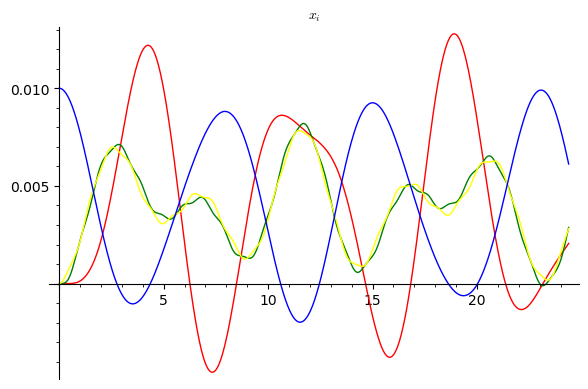

In [14]:
p  = line(zip(times,sol[:,0]), color="red")
p += line(zip(times,sol[:,1]), color="green")
p += line(zip(times,sol[:,2]), color="yellow")
p += line(zip(times,sol[:,3]))

p.show(title="$x_i$")

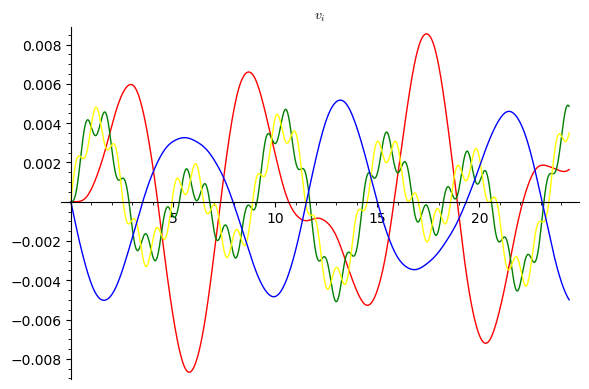

In [15]:
p  = line(zip(times,sol[:,4]), color="red")
p += line(zip(times,sol[:,5]), color="green")
p += line(zip(times,sol[:,6]), color="yellow")
p += line(zip(times,sol[:,7]))

p.show(title="$v_i$")

In [16]:
A = []
omega = []
phi = []
lambdas = []
lambda2 = []

for i in range(N):
    exec(preparse("A_"     + str(i) + " = var(\"A_"     + str(i) + "\""")"))
    exec(preparse("omega_" + str(i) + " = var(\"omega_" + str(i) + "\""")"))
    exec(preparse("phi_"   + str(i) + " = var(\"phi_"   + str(i) + "\""")"))
    exec(preparse("lambdas_"   + str(i) + " = var(\"lambda_"   + str(i) + "\""")"))
    exec(preparse("lambda2_"   + str(i) + " = var(\"delta_"   + str(i) + "\""")"))
    exec(preparse("A      += [A_"     + str(i) + "]"))
    exec(preparse("omega  += [omega_" + str(i) + "]"))
    exec(preparse("phi    += [phi_"   + str(i) + "]"))
    exec(preparse("lambdas+= [lambda_"   + str(i) + "]"))
    exec(preparse("lambda2+= [lambda2_"   + str(i) + "]"))

In [17]:
# решение системы уравнений Эйлера-Лагранжа
# ищем в виде
xi = []
kkk = 1
for i in range(N):
    #xi += [A[i]*cos(omega[i]*t + phi[i])]
    xi += [A[i]*exp(lambdas[i]*t)]
    kkk *= exp(lambdas[i]*t)
    disp(xi[i])
disp(kkk)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
# подставляя решения в систему
# уравнений Эйлера Лагранжа
# получаем систему линейных алгебраичных уравнений
eqsi = []
for i in range(N):
    eq_i = eqs[i].substitute_function(x[i] == xi[i])
    if i > 0:
        eq_i = eq_i.subs(x[i-1] == xi[i-1])
    if i < N - 1:
        eq_i = eq_i.subs(x[i+1] == xi[i+1])
    
    eqsi += [ eq_i ]
    disp(eqsi[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [20]:
M = GenerateMatrix(eqsi, A)
disp(M)

<IPython.core.display.Math object>

In [21]:
det_M = M.det()
disp(det_M)

<IPython.core.display.Math object>

In [22]:
det_M_kkk = (det_M/kkk).full_simplify().expand()

In [23]:
disp(det_M_kkk)

<IPython.core.display.Math object>

In [24]:
for i in range(N):
    det_M_kkk = det_M_kkk.subs(lambdas[i]^2 == lambda2[i])

In [25]:
disp(det_M_kkk)

<IPython.core.display.Math object>

In [26]:
disp(solve(det_M_kkk == 0, lambda2[0]))

<IPython.core.display.Math object>